# Iman Kianian -- Second Assignment of Machine Learning course -- Fall 2021

#### Import Requirements

In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load Data

In [443]:
Train_DS = pd.read_csv (r'train.csv')   #read the csv file
x1_train = Train_DS['feature1'].to_numpy().reshape(4000,1)
x2_train = Train_DS['feature2'].to_numpy().reshape(4000,1)
x_train = np.reshape((np.concatenate((x1_train, x2_train), axis=0)),(2,-1)).T

y_train = Train_DS['label'].to_numpy().reshape(4000,1)

Test_DS = pd.read_csv (r'test.csv')
x1_test = Test_DS['feature1'].to_numpy().reshape(1000,1)
x2_test = Test_DS['feature2'].to_numpy().reshape(1000,1)
x_test = np.reshape((np.concatenate((x1_test,x2_test),axis=0)),(2,-1)).T

y_test = Test_DS['label'].to_numpy().reshape(1000,1)


#### Draw Training Set (Green = Fake , Red = Original)



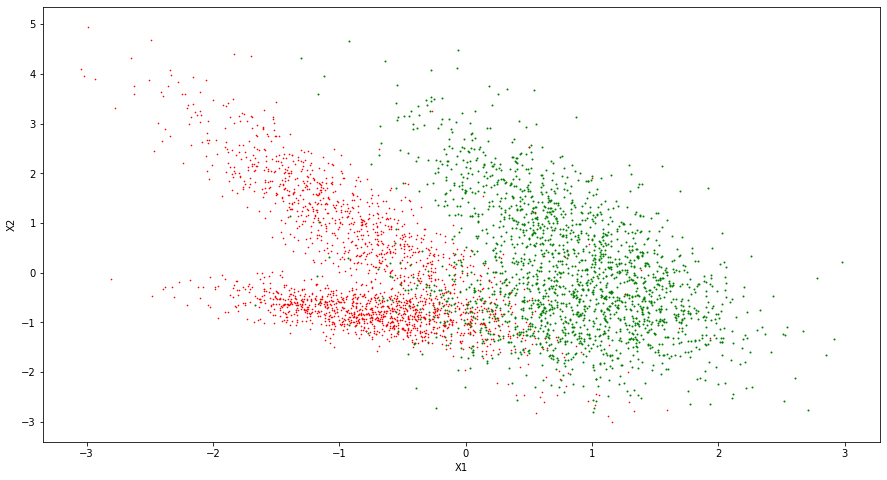

In [444]:
fig = plt.figure(figsize=(15,8))
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        plt.plot(x1_train[i], x2_train[i], marker="o", markersize=1, color="green")
    else:
        plt.plot(x1_train[i], x2_train[i], marker="x", markersize=1, color="red")

plt.show()

#### Draw Training Set (Green = Fake , Red = Original)

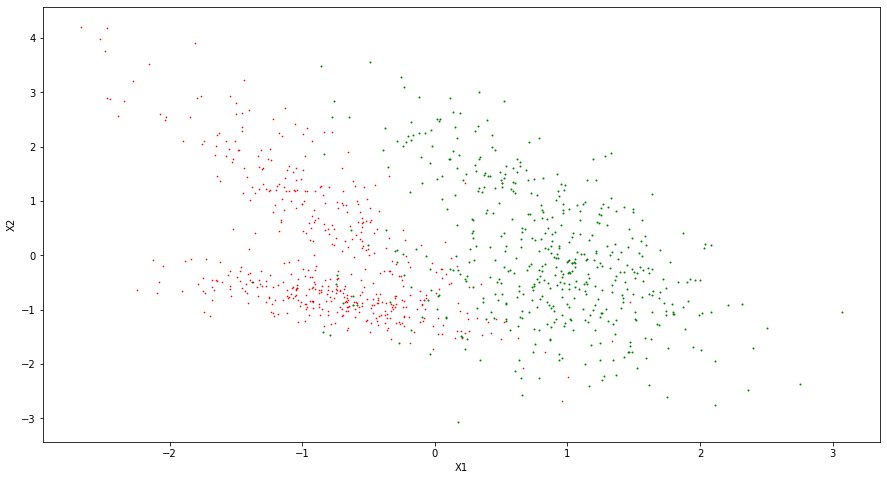

In [445]:
fig = plt.figure(figsize=(15,8))
plt.xlabel("X1")
plt.ylabel("X2")

for i in range(y_test.shape[0]):
    
    if y_test[i] == 1:
        plt.plot(x1_test[i], x2_test[i], marker="o", markersize=1, color="green")
    else:
        plt.plot(x1_test[i], x2_test[i], marker="x", markersize=1, color="red")
plt.show()

In [446]:
def sign_function(x):
    return 1.0 if x > 0  else 0.0

<img src="sign.png"></img>

In [447]:
def Preprocess(X):
    """
       Add a column of 1 indexes to our data.
    """
    Ones = (np.ones((X.shape[0],1)))
    return np.append(Ones, X, axis=1)

In [448]:
def perceptron(*,X,Y,epochs,lr=1e-3):
    """
    X =  Training Data
    Y = Training Labels
    lr = Learning Rate ( Default = 0.001 )
    epochs = Number of Iterations
    """
    X = Preprocess(X)
    W = np.random.rand(X.shape[1],1) # Random W -- Initialize
    MinW = np.zeros((X.shape[1],1))
    Minindex = 0
    
    
    n = X.shape[0] # Number of Training Instances
    m = X.shape[1] # Number of Features
    MisclassifiedHist = [] # History of Misclassified instances during epochs
    for i in range(epochs):
        NOMis = 0   # Count number of Misclassified per each iteration
        for index,instance in enumerate(X): # loop for instances
            y_predict = sign_function(np.dot(instance,W))
            instance= instance.reshape((X.shape[1],1))
            if y_predict != Y[index][0]:
                NOMis +=1
                W = W + lr*(float((Y[index][0] - y_predict))*instance)
        if i == 0:
            MinW = W
        elif MisclassifiedHist[Minindex] > NOMis:
            MinW = W
            Minindex = i
        MisclassifiedHist.append(NOMis)
        
    return MisclassifiedHist, MinW



In [449]:
MisClassifiedHist , W  = perceptron(X=x_train,Y=y_train,epochs=1000)

In [450]:
def MisClass(X,W,Y):
    X = Preprocess(X)
    MisClassfies = []
    for index,instance in enumerate(X): # loop for instances
        y_predict = sign_function(np.dot(instance,W))
        instance= instance.reshape((X.shape[1],1))
        if y_predict!=Y[index][0]:
            MisClassfies.append('Yes')
        else:
            MisClassfies.append('No')
    return MisClassfies

In [461]:
def PlotWithLine(X, W, Y,Error = "Bold"):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(15,8))
    plt.plot(x1, x2, 'b-')
    
    x1 = X[:,0]
    x2 = X[:,1]
    Misclassifies = MisClass(X,W,Y)
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            if(Misclassifies[i] == 'Yes' and Error == "Bold"):
                plt.plot(x1[i], x2[i], marker="o", markersize=5, color="green")
            else:
                plt.plot(x1[i], x2[i], marker="o", markersize=1, color="green")
        else:
            if(Misclassifies[i] == 'Yes' and Error == "Bold"):
                plt.plot(x1[i], x2[i], marker="x", markersize=5, color="red")
            else:
                plt.plot(x1[i], x2[i], marker="x", markersize=1, color="red")
    plt.xlabel("X1")
    plt.ylabel("X2")
    

<img src="DB.png"></img>

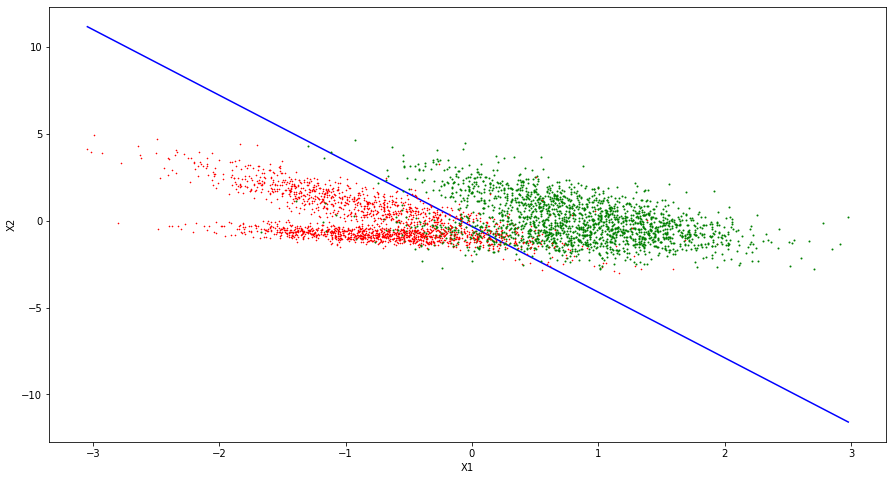

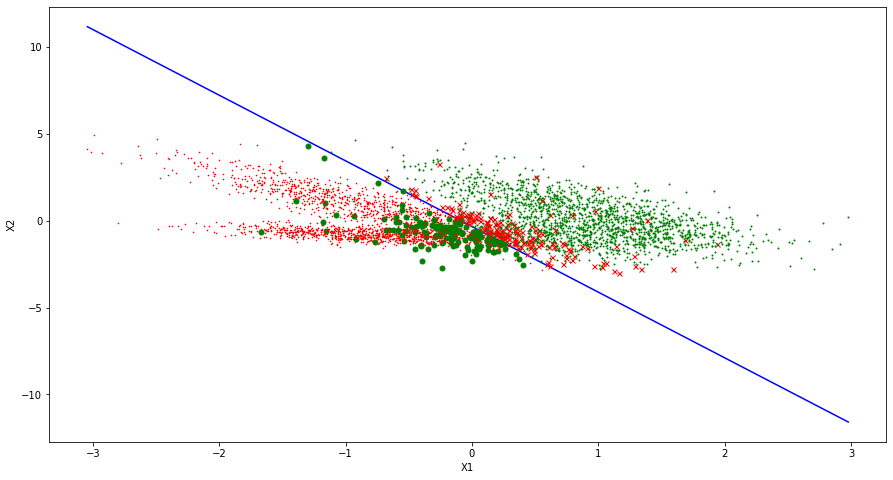

In [462]:
PlotWithLine(x_train,W,y_train,'notbold')
PlotWithLine(x_train,W,y_train)

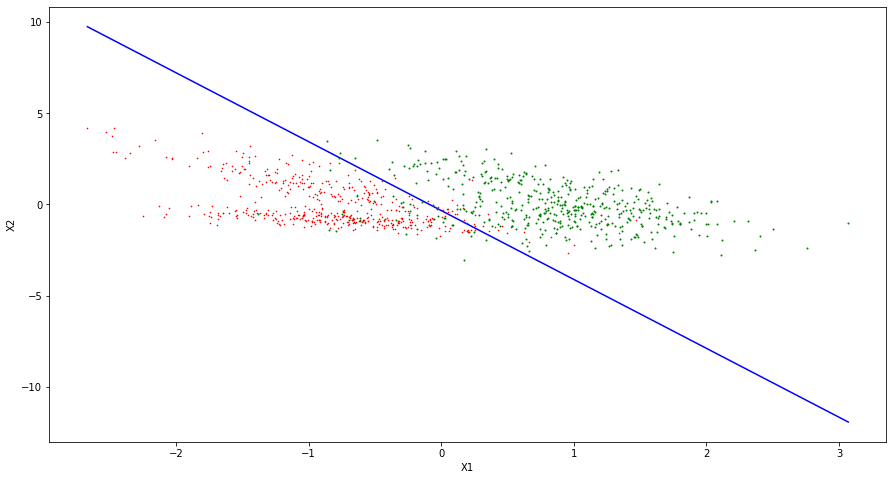

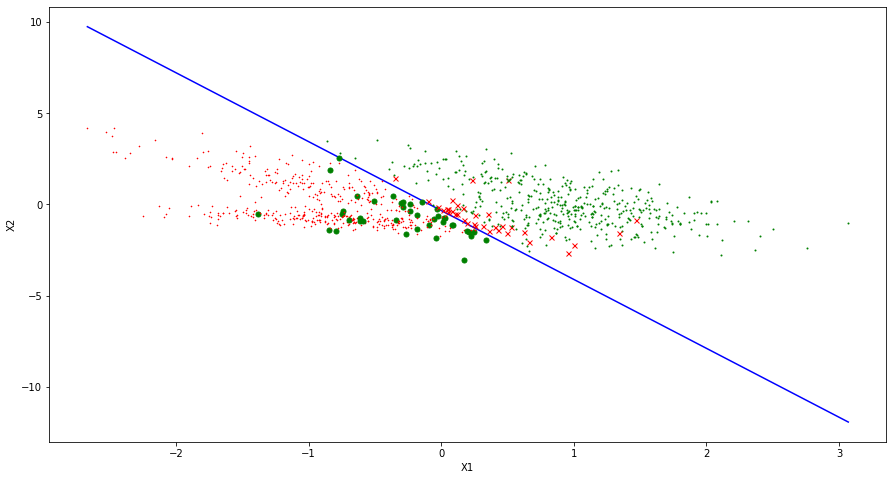

In [463]:
PlotWithLine(x_test,W,y_test,'nobold')
PlotWithLine(x_test,W,y_test)

#### Calculate Errors

In [454]:
def CalculateError(X,Y,W):
    FN = FP = TN = TP = 0
    X = Preprocess(X)
    for index,instance in enumerate(X): # loop for instances
        y_predict = sign_function(np.dot(instance,W))
        instance= instance.reshape((X.shape[1],1))
        if y_predict!=Y[index][0]:
            if float((Y[index][0] - y_predict)) == 1.0:
                FN += 1
            elif float((Y[index][0] - y_predict)) == - 1.0:
                FP += 1
        elif Y[index]== 0.0:
            TN += 1
        else:
            TP +=1
    return TN, TP, FN, FP

In [455]:
TrainErrors = CalculateError(x_train,y_train,W)
print(TrainErrors)
print("Accuracy: ", (TrainErrors[0]+TrainErrors[1])/x_train.shape[0])
print("Number of Misclassified Data: ", (TrainErrors[2]+TrainErrors[3]))

(1833, 1844, 149, 174)
Accuracy:  0.91925
Number of Misclassified Data:  323


In [456]:
TestErrors = CalculateError(x_test,y_test,W)
print(TestErrors) 
print("Accuracy: ", (TestErrors[0]+TestErrors[1])/x_test.shape[0])
print("Number of Misclassified Data: ", (TestErrors[2]+TestErrors[3]))

(468, 457, 40, 35)
Accuracy:  0.925
Number of Misclassified Data:  75


# END